In [9]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-19 06:09:21,716: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend('ibmq_athens')

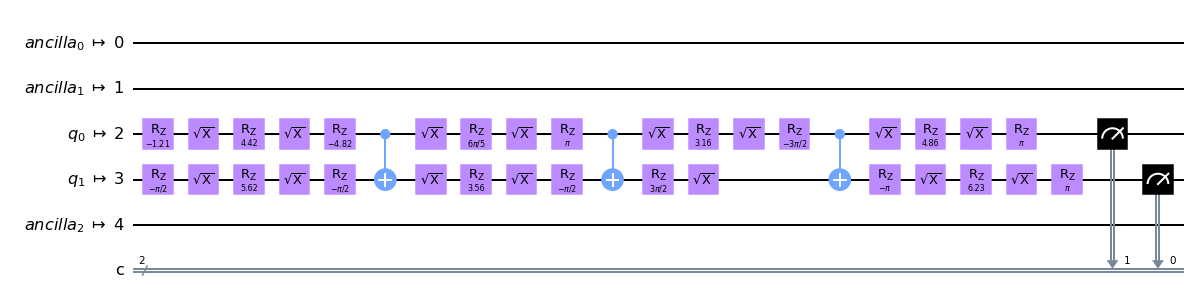

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi/10, qreg_q[0])
circuit.ry(pi, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rx(0.2*pi, qreg_q[0])
circuit.rz(0.4*pi, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.swap(qreg_q[0], qreg_q[1])
circuit.rx(-0.6*pi, qreg_q[0])
circuit.ry(0.5*pi, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rx(0.2*pi, qreg_q[0])
circuit.rz(0.4*pi, qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[1])
circuit.measure(qreg_q[1], creg_c[0])

from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
qr = QuantumRegister(2)
cal_circuit_list, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

tcircuit = transpile(circuit, backend, optimization_level=3, initial_layout=[2, 3])
tcircuit.draw()

In [12]:
cal_result = execute(cal_circuit_list, backend, shots=8192, initial_layout=[2, 3]).result()
result = execute(circuit, backend, shots=8192, initial_layout=[2, 3], optimization_level=3).result()

In [13]:
noisy_counts = result.get_counts()
# Get the filter object
meas_fitter = CompleteMeasFitter(cal_result, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter
# Results with mitigation
mitigated_result = meas_filter.apply(result)
mitigated_counts = mitigated_result.get_counts()

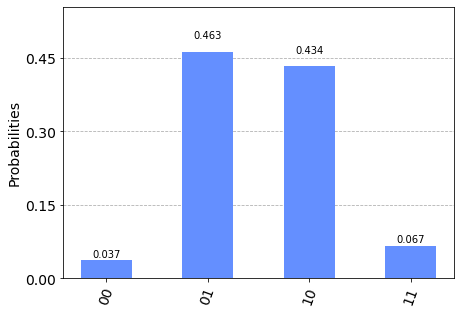

In [14]:
fig = plot_histogram(noisy_counts)
fig.savefig('quantumvol_hist.png', dpi=100)
fig